In [92]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy, scipy, statsmodels, matplotlib
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [93]:
df = pd.read_csv("case_study_preprocessing_issue_id.csv")

df['MIN_CREATED_AT'] = pd.to_datetime(df['MIN_CREATED_AT'], errors='coerce')
df['CREATED_AT_MONTH'] = df['MIN_CREATED_AT'].dt.to_period('M')

df.head()


/var/folders/1j/n2trc9vd7tsdcr8t98s8xwxw0000gn/T/ipykernel_62189/200261238.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['CREATED_AT_MONTH'] = df['MIN_CREATED_AT'].dt.to_period('M')


,REASON,DETAILED_REASON,REASON_GROUP,COUNTRY,MERCHANT_ID,MCC_GROUP,QUEUE_WAITING_TIME_SECONDS,AGENT_ID,AGENT_COMPANY,ISSUE_ID,MIN_CREATED_AT,MAX_ENDED_AT,FINAL_STATUS,TOTAL_TOUCHPOINTS,TOTAL_RESOLUTION_TIME_SECONDS,TOTAL_RESOLUTION_TIME_MINUTES,TOTAL_RESOLUTION_TIME_DAYS,FINAL_CHANNEL,PRIORITY,Z_SCORE,CREATED_AT_MONTH
0,Outage,Outage,Outage,IT,-9223313154224916571,Retail Outlet Services,42.00,3109154870074365133,BPO1,2,2022-03-01 17:21:24+00:00,2022-03-01 17:26:16+00:00,Resolved,1,292.00,4.87,0.00,call,1,-0.14,2022-03
1,Pre SignUp - SignUp,No activation code,Signup,IT,-9223210546642890192,Miscellaneous Stores,10.00,-2139152697461735578,BPO1,5,2022-03-29 19:42:56+00:00,2022-03-29 19:54:30+00:00,Resolved,1,694.00,11.57,0.01,call,3,-0.13,2022-03
2,SumUp Card,CRD: MFA issue,Other technical issues,IT,-9223059260326693727,Professional Services and Membership Organizations,10.00,-3343806823028458668,BPO2,7,2022-10-19 14:53:16+00:00,2022-10-19 15:05:29+00:00,Resolved,1,733.00,12.22,0.01,call,2,-0.13,2022-10
3,Transactions,Transaction status,Payouts,IT,-9222775512423750869,Miscellaneous Stores,35.00,-2605649640233040399,BPO1,10,2022-06-04 17:13:44+00:00,2022-06-04 17:32:48+00:00,Resolved,1,1144.00,19.07,0.01,call,2,-0.12,2022-06
4,Solo,Solo: Set-up - 1st transaction,Product setup/activation,FR,-9222594652448935512,Contracted Services,13.00,3770372967102052784,BPO2,14,2022-04-28 13:55:56+00:00,2022-04-28 14:06:32+00:00,Resolved,1,636.00,10.60,0.01,call,3,-0.13,2022-04


In [94]:

# Define the data for the DataFrame based off of analysis done in script 2 
data = {
    'FINAL_CHANNEL': ['call', 'call', 'call', 'chat', 'chat', 'chat', 'email', 'email', 'email'],
    'PRIORITY': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    '90_QUARTILE_RESOLUTION_TIME_SECONDS': [1273, 1288, 1341, 1757, 1542, 1575, 316608, 384000, 432000],
    'RECOMMENDED_QUEUE_WAIT_TIME_SECONDS': [69, 56, 50, 34, 26, 15, None, None, None],
    'RECOMMENDED_PER_CHANNEL_WINDOW_SECONDS': [1500, 1500, 1500, 1860, 1860, 1860, 432000, 432000, 432000],
    'RECOMMENDED_PER_CHANNEL_PER_PRIORITY_WINDOW_SECONDS': [1290, 1290, 1500, 1560, 1590, 1860, 345600, 388800, 432000],
    'RECOMMENDED_PER_CHANNEL_PER_PRIORITY_NO_TOUCHPOINTS': [1, 1, 1, 1, 1, 1, 3, 3, 3]
}

# Create the DataFrame
df_targets = pd.DataFrame(data)

# Convert specified columns to float64
df_targets['RECOMMENDED_PER_CHANNEL_WINDOW_SECONDS'] = df_targets['RECOMMENDED_PER_CHANNEL_WINDOW_SECONDS'].astype(float)
df_targets['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_WINDOW_SECONDS'] = df_targets['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_WINDOW_SECONDS'].astype(float)

df_targets['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_NO_TOUCHPOINTS'] = df_targets['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_NO_TOUCHPOINTS'].astype(float)
df_targets['RECOMMENDED_QUEUE_WAIT_TIME_SECONDS'] = df_targets['RECOMMENDED_QUEUE_WAIT_TIME_SECONDS'].astype(float)



In [95]:
df.head()

,REASON,DETAILED_REASON,REASON_GROUP,COUNTRY,MERCHANT_ID,MCC_GROUP,QUEUE_WAITING_TIME_SECONDS,AGENT_ID,AGENT_COMPANY,ISSUE_ID,MIN_CREATED_AT,MAX_ENDED_AT,FINAL_STATUS,TOTAL_TOUCHPOINTS,TOTAL_RESOLUTION_TIME_SECONDS,TOTAL_RESOLUTION_TIME_MINUTES,TOTAL_RESOLUTION_TIME_DAYS,FINAL_CHANNEL,PRIORITY,Z_SCORE,CREATED_AT_MONTH
0,Outage,Outage,Outage,IT,-9223313154224916571,Retail Outlet Services,42.00,3109154870074365133,BPO1,2,2022-03-01 17:21:24+00:00,2022-03-01 17:26:16+00:00,Resolved,1,292.00,4.87,0.00,call,1,-0.14,2022-03
1,Pre SignUp - SignUp,No activation code,Signup,IT,-9223210546642890192,Miscellaneous Stores,10.00,-2139152697461735578,BPO1,5,2022-03-29 19:42:56+00:00,2022-03-29 19:54:30+00:00,Resolved,1,694.00,11.57,0.01,call,3,-0.13,2022-03
2,SumUp Card,CRD: MFA issue,Other technical issues,IT,-9223059260326693727,Professional Services and Membership Organizations,10.00,-3343806823028458668,BPO2,7,2022-10-19 14:53:16+00:00,2022-10-19 15:05:29+00:00,Resolved,1,733.00,12.22,0.01,call,2,-0.13,2022-10
3,Transactions,Transaction status,Payouts,IT,-9222775512423750869,Miscellaneous Stores,35.00,-2605649640233040399,BPO1,10,2022-06-04 17:13:44+00:00,2022-06-04 17:32:48+00:00,Resolved,1,1144.00,19.07,0.01,call,2,-0.12,2022-06
4,Solo,Solo: Set-up - 1st transaction,Product setup/activation,FR,-9222594652448935512,Contracted Services,13.00,3770372967102052784,BPO2,14,2022-04-28 13:55:56+00:00,2022-04-28 14:06:32+00:00,Resolved,1,636.00,10.60,0.01,call,3,-0.13,2022-04


In [96]:

# Merge based on CHANNEL and PRIORITY
merged_df = df.merge(df_targets, on=['FINAL_CHANNEL', 'PRIORITY'], how='left')

# Calculate the conditions
merged_df['RESOLUTION_TIME_BELOW_CHANNEL_STANDARD'] = merged_df['TOTAL_RESOLUTION_TIME_SECONDS'] < merged_df['RECOMMENDED_PER_CHANNEL_WINDOW_SECONDS']
merged_df['RESOLUTION_TIME_BELOW_CHANNEL_PRIO_STANDARD'] = merged_df['TOTAL_RESOLUTION_TIME_SECONDS'] < merged_df['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_WINDOW_SECONDS']
merged_df['TOUCHPOINTS_BELOW'] = merged_df['TOTAL_TOUCHPOINTS'] < merged_df['RECOMMENDED_PER_CHANNEL_PER_PRIORITY_NO_TOUCHPOINTS']
merged_df['QUEUE_TIME_BELOW'] = merged_df['QUEUE_WAITING_TIME_SECONDS'] < merged_df['RECOMMENDED_QUEUE_WAIT_TIME_SECONDS']

# Group by COUNTRY and calculate totals and percentages
results = merged_df.groupby(['FINAL_CHANNEL','PRIORITY','COUNTRY']).agg(
    TOTAL_ISSUES=('ISSUE_ID', 'count'),
    BELOW_CHANNEL_RESOLUTION_TIME=('RESOLUTION_TIME_BELOW_CHANNEL_STANDARD', 'sum'),
    BELOW_CHANNEL_PRIO_RESOLUTION_TIME=('RESOLUTION_TIME_BELOW_CHANNEL_PRIO_STANDARD', 'sum'),
    BELOW_TOUCHPOINTS=('TOUCHPOINTS_BELOW', 'sum'),
    BELOW_QUEUE_TIME=('QUEUE_TIME_BELOW', 'sum')

).reset_index()

# Calculate percentages
results['PERCENT_BELOW_CHANNEL_RESOLUTION_TIME'] = (results['BELOW_CHANNEL_RESOLUTION_TIME'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] = (results['BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_TOUCHPOINTS'] = (results['BELOW_TOUCHPOINTS'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_QUEUE_TIME'] = (results['BELOW_QUEUE_TIME'] / results['TOTAL_ISSUES']) * 100



In [97]:

# Step 1: Rank Channels for `PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME` (with dynamic weighting based on PRIORITY)
results['RANK_CHANNEL_PRIO_RESOLUTION'] = results['PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] / 10

# Apply different weights based on the PRIORITY
results['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] = np.where(
    results['PRIORITY'] == 3, results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2,
    np.where(results['PRIORITY'] == 2, results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2.25,
             results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2.5)
)

# Step 2: Rank Call and Chat Channels Based on `PERCENT_BELOW_QUEUE_TIME` with dynamic weights
call_chat = results[results['FINAL_CHANNEL'].isin(['call', 'chat'])].copy()

# Rank based on `PERCENT_BELOW_QUEUE_TIME`
call_chat['RANK_QUEUE_TIME'] = call_chat['PERCENT_BELOW_QUEUE_TIME'] / 10

# Apply dynamic weights based on `PRIORITY` for queue time
call_chat['WEIGHTED_RANK_QUEUE_TIME'] = np.where(
    call_chat['PRIORITY'] == 3, call_chat['RANK_QUEUE_TIME'] * 1,
    np.where(call_chat['PRIORITY'] == 2, call_chat['RANK_QUEUE_TIME'] * 1.25,
             call_chat['RANK_QUEUE_TIME'] * 1.5)
)

call_chat.head()

# Step 3: Rank Email Channels Based on `PERCENT_BELOW_TOUCHPOINTS` with dynamic weights
email = results[results['FINAL_CHANNEL'] == 'email'].copy()

# Rank based on `PERCENT_BELOW_TOUCHPOINTS`
email['RANK_TOUCHPOINTS'] = email['PERCENT_BELOW_TOUCHPOINTS'] / 10

# Apply dynamic weights based on `PRIORITY` for touchpoints
email['WEIGHTED_RANK_TOUCHPOINTS'] = np.where(
    email['PRIORITY'] == 3, email['RANK_TOUCHPOINTS'] * 1,
    np.where(email['PRIORITY'] == 2, email['RANK_TOUCHPOINTS'] * 1.25,
             email['RANK_TOUCHPOINTS'] * 1.5)
)

email.head()

# Step 4: Combine Ranks into a Total Score
call_chat['TOTAL_SCORE'] = call_chat['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] + call_chat['WEIGHTED_RANK_QUEUE_TIME']
email['TOTAL_SCORE'] = email['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] + email['WEIGHTED_RANK_TOUCHPOINTS']

# Step 5: Merge Results
df_combined = pd.concat([call_chat, email])
df_combined = df_combined.sort_values('TOTAL_SCORE', ascending=True)

# Step 6: Aggregate by Country and Channel (Remove the priority distinction after summing scores)
final_rank = df_combined.groupby(['COUNTRY', 'FINAL_CHANNEL']).agg(
    TOTAL_SCORE=('TOTAL_SCORE', 'sum'),
).reset_index()

# Step 7: Sort the final results by the total score
final_rank = final_rank.sort_values('TOTAL_SCORE', ascending=False)

# Display the final ranked dataframe
final_rank


,COUNTRY,FINAL_CHANNEL,TOTAL_SCORE
5,IT,email,97.61
2,FR,email,95.34
0,FR,call,95.25
4,IT,chat,91.58
3,IT,call,91.19
1,FR,chat,90.37


In [98]:

# Group by COUNTRY and calculate totals and percentages
results = merged_df.groupby(['FINAL_CHANNEL','PRIORITY','AGENT_COMPANY', 'COUNTRY', 'CREATED_AT_MONTH']).agg(
    TOTAL_ISSUES=('ISSUE_ID', 'count'),
    BELOW_CHANNEL_RESOLUTION_TIME=('RESOLUTION_TIME_BELOW_CHANNEL_STANDARD', 'sum'),
    BELOW_CHANNEL_PRIO_RESOLUTION_TIME=('RESOLUTION_TIME_BELOW_CHANNEL_PRIO_STANDARD', 'sum'),
    BELOW_TOUCHPOINTS=('TOUCHPOINTS_BELOW', 'sum'),
    BELOW_QUEUE_TIME=('QUEUE_TIME_BELOW', 'sum')

).reset_index()

# Calculate percentages
results['PERCENT_BELOW_CHANNEL_RESOLUTION_TIME'] = (results['BELOW_CHANNEL_RESOLUTION_TIME'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] = (results['BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_TOUCHPOINTS'] = (results['BELOW_TOUCHPOINTS'] / results['TOTAL_ISSUES']) * 100
results['PERCENT_BELOW_QUEUE_TIME'] = (results['BELOW_QUEUE_TIME'] / results['TOTAL_ISSUES']) * 100




In [99]:
results.head()

,FINAL_CHANNEL,PRIORITY,AGENT_COMPANY,COUNTRY,CREATED_AT_MONTH,TOTAL_ISSUES,BELOW_CHANNEL_RESOLUTION_TIME,BELOW_CHANNEL_PRIO_RESOLUTION_TIME,BELOW_TOUCHPOINTS,BELOW_QUEUE_TIME,PERCENT_BELOW_CHANNEL_RESOLUTION_TIME,PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME,PERCENT_BELOW_TOUCHPOINTS,PERCENT_BELOW_QUEUE_TIME
0,call,1,BPO1,FR,2022-01,252,234,228,0,245,92.86,90.48,0.00,97.22
1,call,1,BPO1,FR,2022-02,194,176,171,0,184,90.72,88.14,0.00,94.85
2,call,1,BPO1,FR,2022-03,249,229,219,0,242,91.97,87.95,0.00,97.19
3,call,1,BPO1,FR,2022-04,196,176,170,0,176,89.80,86.73,0.00,89.80
4,call,1,BPO1,FR,2022-05,169,157,154,0,154,92.90,91.12,0.00,91.12


In [105]:
import numpy as np

# Step 1: Rank Channels for `PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME` (with dynamic weighting based on PRIORITY)
results['RANK_CHANNEL_PRIO_RESOLUTION'] = results['PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME'] / 10

# Apply different weights based on the PRIORITY
results['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] = np.where(
    results['PRIORITY'] == 3, results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2,
    np.where(results['PRIORITY'] == 2, results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2.25,
             results['RANK_CHANNEL_PRIO_RESOLUTION'] * 2.5)
)

# Step 2: Rank Call and Chat Channels Based on `PERCENT_BELOW_QUEUE_TIME` with dynamic weights
call_chat = results[results['FINAL_CHANNEL'].isin(['call', 'chat'])].copy()

# Rank based on `PERCENT_BELOW_QUEUE_TIME`
call_chat['RANK_QUEUE_TIME'] = call_chat['PERCENT_BELOW_QUEUE_TIME'] / 10

# Apply dynamic weights based on PRIORITY for queue time
call_chat['WEIGHTED_RANK_QUEUE_TIME'] = np.where(
    call_chat['PRIORITY'] == 3, call_chat['RANK_QUEUE_TIME'] * 1,
    np.where(call_chat['PRIORITY'] == 2, call_chat['RANK_QUEUE_TIME'] * 1.25,
             call_chat['RANK_QUEUE_TIME'] * 1.5)
)

# Step 3: Rank Email Channels Based on `PERCENT_BELOW_TOUCHPOINTS` with dynamic weights
email = results[results['FINAL_CHANNEL'] == 'email'].copy()

# Rank based on `PERCENT_BELOW_TOUCHPOINTS`
email['RANK_TOUCHPOINTS'] = email['PERCENT_BELOW_TOUCHPOINTS'] / 10

# Apply dynamic weights based on PRIORITY for touchpoints
email['WEIGHTED_RANK_TOUCHPOINTS'] = np.where(
    email['PRIORITY'] == 3, email['RANK_TOUCHPOINTS'] * 1,
    np.where(email['PRIORITY'] == 2, email['RANK_TOUCHPOINTS'] * 1.25,
             email['RANK_TOUCHPOINTS'] * 1.5)
)

# Step 4: Combine Ranks into a Total Score
call_chat['TOTAL_SCORE'] = call_chat['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] + call_chat['WEIGHTED_RANK_QUEUE_TIME']
email['TOTAL_SCORE'] = email['WEIGHTED_RANK_CHANNEL_PRIO_RESOLUTION'] + email['WEIGHTED_RANK_TOUCHPOINTS']

# Step 5: Merge Results (for Call, Chat, and Email)
df_combined = pd.concat([call_chat, email])

# Sort by Total Score
df_combined = df_combined.sort_values('TOTAL_SCORE', ascending=True)

# Step 6: Aggregate by AGENT_COMPANY and sum the TOTAL_SCORE
final_rank = df_combined.groupby(['AGENT_COMPANY']).agg(
    TOTAL_SCORE=('TOTAL_SCORE', 'sum'),
).reset_index()

# Step 7: Sort the final results by TOTAL_SCORE
final_rank = final_rank.sort_values('TOTAL_SCORE', ascending=True)

# Display the final ranked dataframe
final_rank.head()


,AGENT_COMPANY,TOTAL_SCORE
2,SUMUP,4780.77
1,BPO2,6495.14
0,BPO1,6802.94


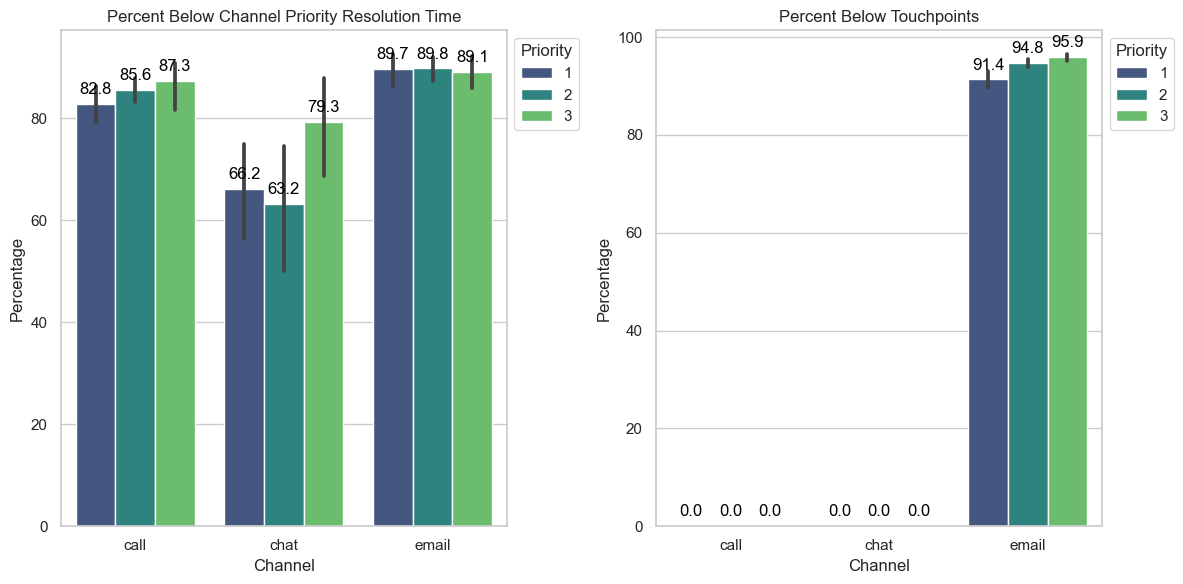

FRANCE: Email performed the best, Chat the worst.


In [101]:



france_results = results[results['COUNTRY'] == 'FR']

# Filter the DataFrame for France (country code 'FR')

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(12, 6))

# Bar plot for Percent Below Channel Priority Resolution Time
plt.subplot(1, 2, 1)
bar_plot1 = sns.barplot(data=france_results, 
                         x='FINAL_CHANNEL', 
                         y='PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME', 
                         hue='PRIORITY', 
                         palette='viridis')
plt.title('Percent Below Channel Priority Resolution Time')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Channel Priority Resolution Time
for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                       ha='center', va='bottom',  # Position above the bar
                       fontsize=12, color='black', 
                       xytext=(0, 5),  # Offset above the bar
                       textcoords='offset points')

# Bar plot for Percent Below Touchpoints
plt.subplot(1, 2, 2)
bar_plot2 = sns.barplot(data=france_results, 
                         x='FINAL_CHANNEL', 
                         y='PERCENT_BELOW_TOUCHPOINTS', 
                         hue='PRIORITY', 
                         palette='viridis')
plt.title('Percent Below Touchpoints')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Touchpoints
for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                       ha='center', va='bottom',  # Position above the bar
                       fontsize=12, color='black', 
                       xytext=(0, 5),  # Offset above the bar
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary statement
print("FRANCE: Email performed the best, Chat the worst.")


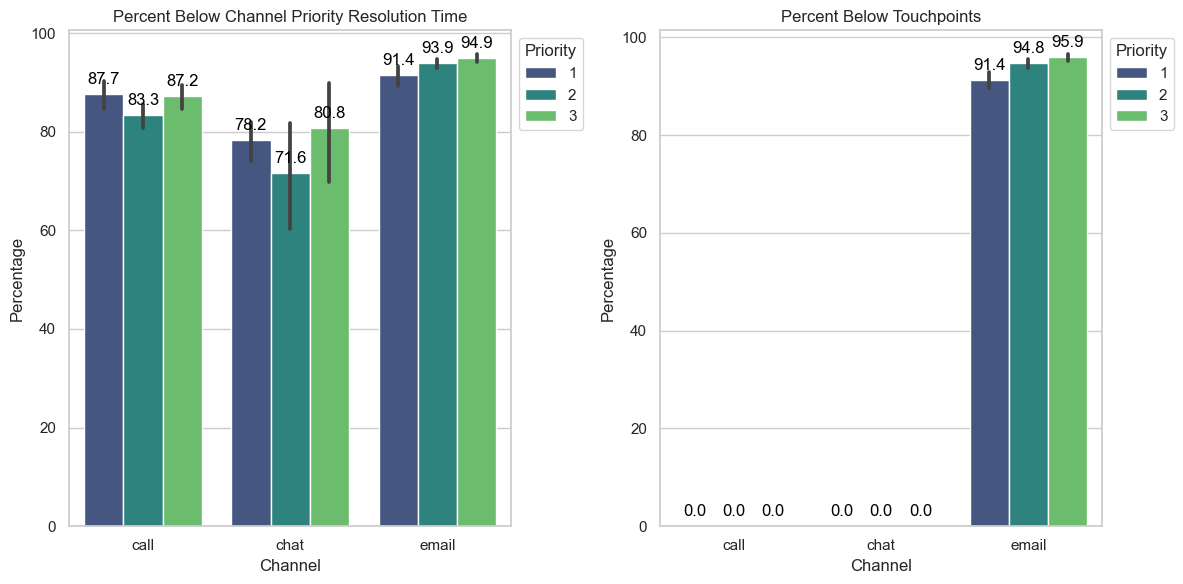

FRANCE: Email performed the best, Chat the worst.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



italy_results = results[results['COUNTRY'] == 'IT']

# Filter the DataFrame for France (country code 'FR')

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(12, 6))

# Bar plot for Percent Below Channel Priority Resolution Time
plt.subplot(1, 2, 1)
bar_plot1 = sns.barplot(data=italy_results, 
                         x='FINAL_CHANNEL', 
                         y='PERCENT_BELOW_CHANNEL_PRIO_RESOLUTION_TIME', 
                         hue='PRIORITY', 
                         palette='viridis')
plt.title('Percent Below Channel Priority Resolution Time')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Channel Priority Resolution Time
for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                       ha='center', va='bottom',  # Position above the bar
                       fontsize=12, color='black', 
                       xytext=(0, 5),  # Offset above the bar
                       textcoords='offset points')

# Bar plot for Percent Below Touchpoints
plt.subplot(1, 2, 2)
bar_plot2 = sns.barplot(data=france_results, 
                         x='FINAL_CHANNEL', 
                         y='PERCENT_BELOW_TOUCHPOINTS', 
                         hue='PRIORITY', 
                         palette='viridis')
plt.title('Percent Below Touchpoints')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Touchpoints
for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                       ha='center', va='bottom',  # Position above the bar
                       fontsize=12, color='black', 
                       xytext=(0, 5),  # Offset above the bar
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary statement
print("FRANCE: Email performed the best, Chat the worst.")


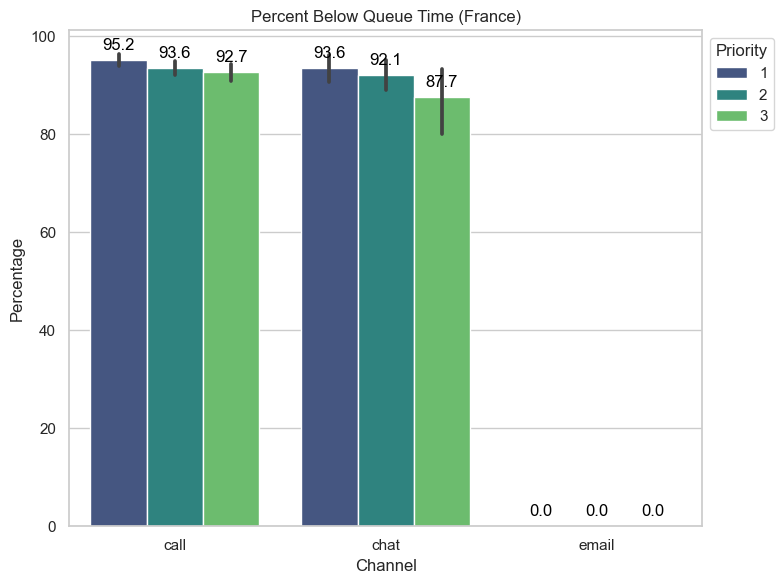

ITALY: Queue Time performance across channels displayed.


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Italy (country code 'IT')
france_results = results[results['COUNTRY'] == 'FR']

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot for Percent Below Queue Time
plt.figure(figsize=(8, 6))

# Bar plot for Percent Below Queue Time
bar_plot = sns.barplot(data=france_results, 
                       x='FINAL_CHANNEL', 
                       y='PERCENT_BELOW_QUEUE_TIME', 
                       hue='PRIORITY', 
                       palette='viridis')
plt.title('Percent Below Queue Time (France)')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Queue Time
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom',  # Position above the bar
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # Offset above the bar
                      textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary statement
print("ITALY: Queue Time performance across channels displayed.")


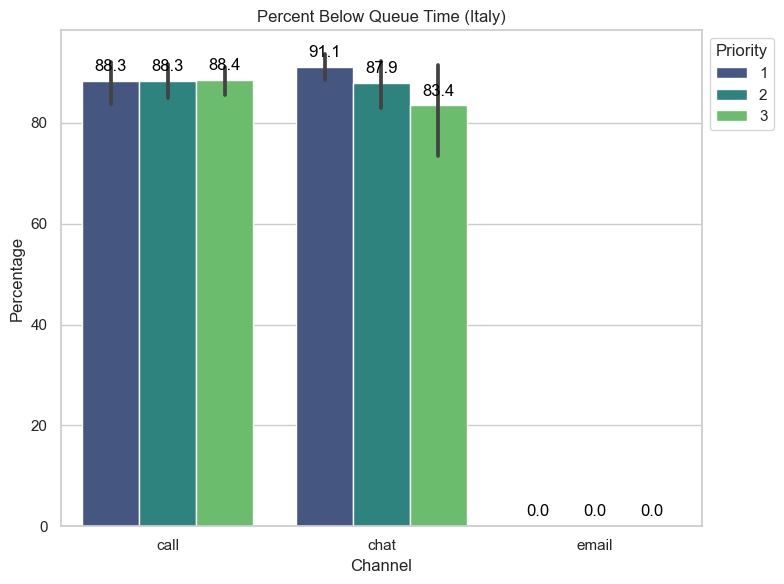

ITALY: Queue Time performance across channels displayed.


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Italy (country code 'IT')
italy_results = results[results['COUNTRY'] == 'IT']

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot for Percent Below Queue Time
plt.figure(figsize=(8, 6))

# Bar plot for Percent Below Queue Time
bar_plot = sns.barplot(data=italy_results, 
                       x='FINAL_CHANNEL', 
                       y='PERCENT_BELOW_QUEUE_TIME', 
                       hue='PRIORITY', 
                       palette='viridis')
plt.title('Percent Below Queue Time (Italy)')
plt.xlabel('Channel')
plt.ylabel('Percentage')
plt.legend(title='Priority', bbox_to_anchor=(1, 1), loc='upper left')

# Add totals above bars for Percent Below Queue Time
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom',  # Position above the bar
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # Offset above the bar
                      textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary statement
print("ITALY: Queue Time performance across channels displayed.")
